In [1]:
import numpy as np
import gd as g
import matplotlib.pyplot as plt

In [22]:
n = 10
A = np.eye(n) * np.arange(1,11)
b = np.ones(n)
x0 = np.zeros(n)

In [23]:
func = lambda x: 0.5 * (A @ x - b).T @ (A @ x - b)
grad = lambda x: A.T @ ( A @ x - b)

In [24]:
def Adam(x0, alf, b1, b2, eps, func, grad, t):
    xk = x0
    m_t = 0
    v_t = 0
    pow_b1 = b1
    pow_b2 = b2 
    res = [func(xk)]
    for i in range(1, t + 1):
        grad_t = grad(xk)
        m_t = b1 * m_t + (1 - b1) * grad_t
        v_t = b2 * v_t + (1 - b2) * grad_t**2
        m_t_tmp = m_t / (1 - pow_b1)
        v_t_tmp = v_t / (1 - pow_b2)
        xk -= alf * m_t_tmp / (v_t_tmp**0.5 + eps)
        res.append(func(xk))
    return res

In [25]:
res = Adam(x0, 1e-3, 0.9, 0.999, 1e-8, func, grad, 1000)

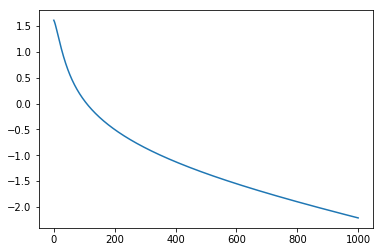

In [26]:
plt.plot(np.log(res))
plt.show()